I built the predictive models to predict the diagnosis of breast cancer with four methods, decision tree, logistic regression, k-nearest neighbors and support vector machine. I measured the model goodness by accuracy, which is among all predictions, the percentage of correct predictions.

# Import packages and file

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import linear_model
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read file
df=pd.read_csv('wdbc.data',header=None,names=['ID','Diagnosis','mean radius' ,'mean texture', 
         'mean perimeter' ,'mean area',
         'mean smoothness', 'mean compactness' ,
         'mean concavity',
         'mean concave points' ,'mean symmetry', 
         'mean fractal dimension',
         'radius error', 'texture error', 'perimeter error', 
         'area error',
         'smoothness error', 'compactness error', 'concavity error',
         'concave points error', 'symmetry error', 
         'fractal dimension error',
         'worst radius', 'worst texture', 'worst perimeter',
         'worst area', 'worst smoothness', 'worst compactness',
         'worst concavity', 'worst concave points', 
         'worst symmetry', 'worst fractal dimension'])
df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explore the data

Before diving into the modeling part, let's explore the data to understand the data structure.

In [4]:
#Shape of dataframe
n_row, n_features = df.shape
print ('The dimensions of the data set are', n_row, 'by', (n_features-2))

The dimensions of the data set are 569 by 30


In [5]:
#How much different are the target variable(Diagnosis)
print ("Total number of diagnosis are", str(df.shape[0]), ",", df['Diagnosis'].value_counts()[1], "Benign and",df['Diagnosis'].value_counts()[0], "Malignant"
)

Total number of diagnosis are 569 , 212 Benign and 357 Malignant


In [6]:
df.describe()

,ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
X = df.drop(labels=['ID','Diagnosis'],axis=1)
Y = df['Diagnosis']

Here, we have 30 features and the target variable is Diagnosis.

# Visualization

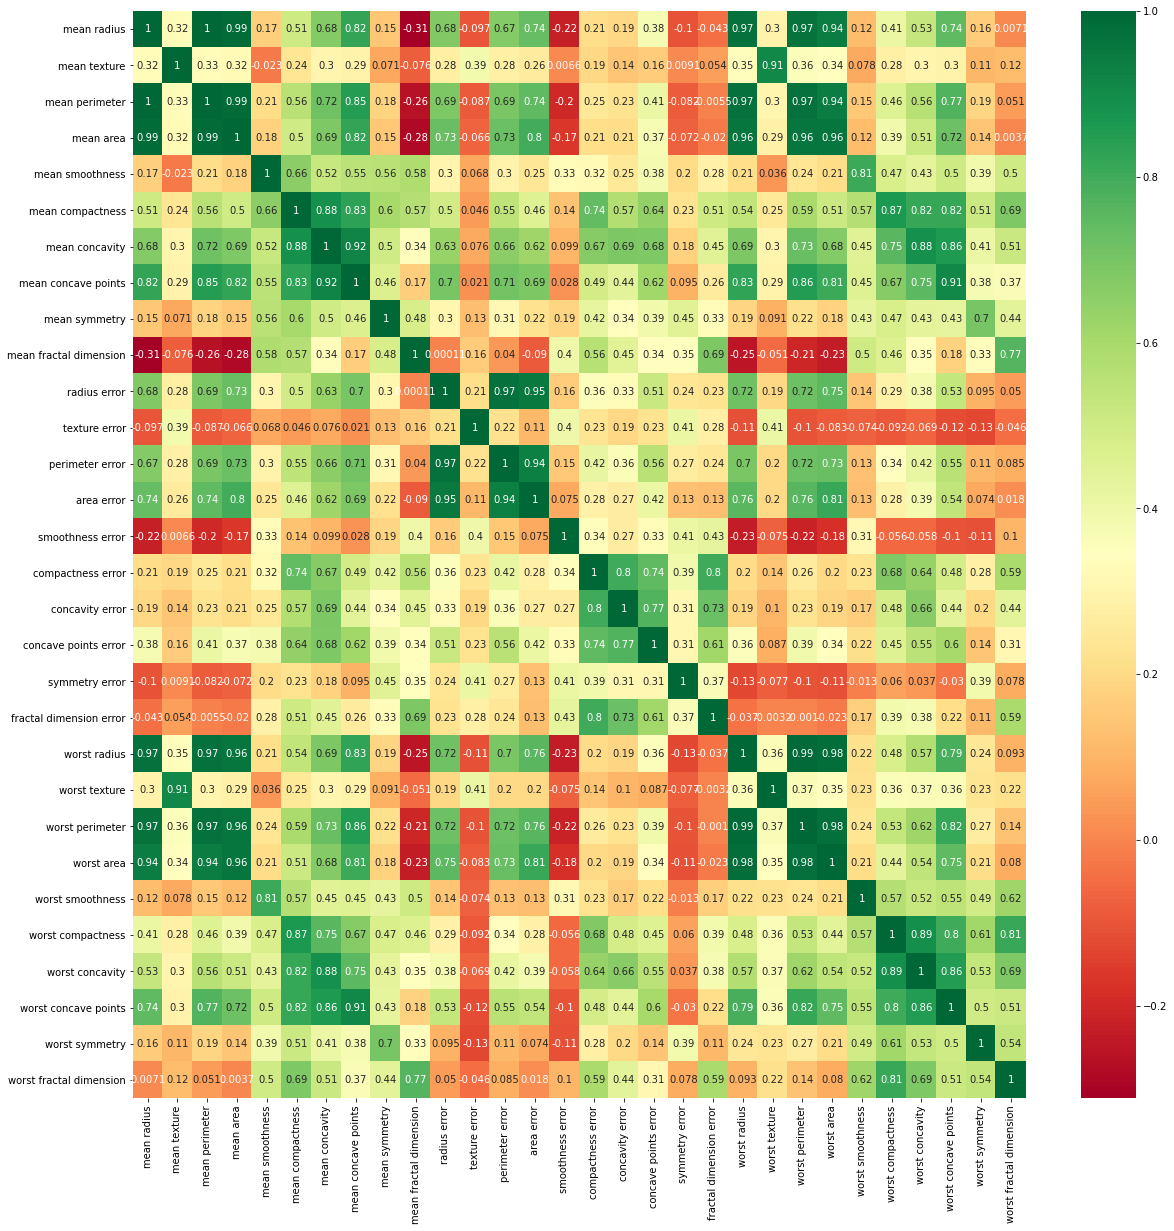

In [8]:
#HeatMap for correlation 
plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Since there are too many features, let's zoom in to the 3 features with highest correlation

In [9]:
df['Diagnosis_']=df['Diagnosis']
df['Diagnosis_']=df['Diagnosis_'].replace({'M': 0, 'B': 1})
corr_matrix = df.corr()
top = abs(corr_matrix['Diagnosis_']).sort_values(ascending=False)
top[1:4]

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
Name: Diagnosis_, dtype: float64

Next, I want to visualize the two features with highest correlation 

([], [])

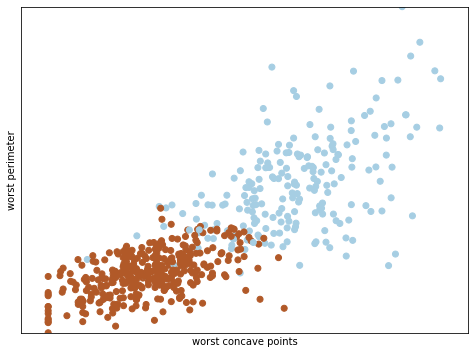

In [10]:
# coefficient with target variable(Diagnosis)

from mpl_toolkits.mplot3d import Axes3D

X = df.loc[:, ['worst concave points', 'worst perimeter']].values 
Y_ = df['Diagnosis_']

x_min, x_max = X[:, 0].min() - .02, X[:, 0].max() + .02
y_min, y_max = X[:, 1].min() - .02, X[:, 1].max() + .02

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y_, cmap=plt.cm.Paired)
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Then, I consider the 3 features with highest correlation 

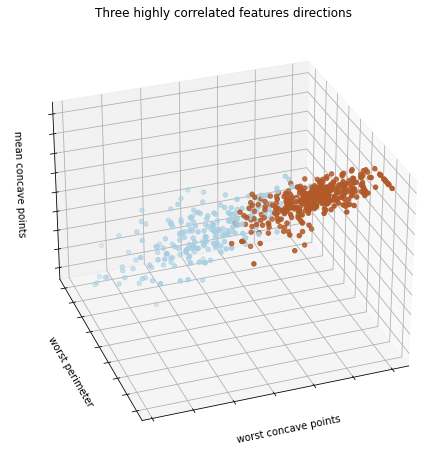

In [11]:
# coefficient with target variable(Diagnosis)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = df.loc[:, ['worst concave points', 
                       'worst perimeter',
                       'mean concave points']].values
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], 
           X_reduced[:, 2], c=Y_, cmap=plt.cm.Paired)
ax.set_title("Three highly correlated features directions")
ax.set_xlabel("worst concave points")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("worst perimeter")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("mean concave points")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Model selection with nested grid search cv

To decide which model is the best, I conducted nested grid search cv to find the best model.

In [12]:
#create a dictionary to save the result
accuracy_scores = {'tree':{},'knn':{},'logistic':{},'svm':{}}

In [13]:
#Define inner and outer cross validation
inner_cv=KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv=KFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree

In [14]:
#Tune 3 hyperparameters: max_depth, criterion and min_samples_split

depth_range = list(range(1,10))
criterions = ["entropy", "gini"]
split=list(range(2,10))

tree_grid = dict(max_depth = depth_range, criterion = criterions, min_samples_split=split)

tree = tree.DecisionTreeClassifier(random_state=42)
tree_clf=GridSearchCV(estimator=tree, param_grid=tree_grid, cv = inner_cv, scoring = 'accuracy')

#Nested CV with parameter opitimization
tree_score=cross_val_score(tree_clf,X=X,y=Y, cv=outer_cv)

print ("Cross validation scores =",tree_score)
print("Mean of cross validation scores =",tree_score.mean())


#Append the accuracy
accuracy_scores['tree']=tree_score.mean()

Cross validation scores = [0.92982456 0.93859649 0.9122807  0.92105263 0.92035398]
Mean of cross validation scores = 0.9244216736531594


# Logistic Regression

In [15]:
#Tune 3 hyperparameters: C, solver and penalty

C_range=[10**i for i in range(1,10)]
solve = ["liblinear", "newton-cg"]
penal=['l1', 'l2', 'elasticnet']

log_grid = dict(C = C_range, solver = solve, penalty=penal)

log =  linear_model.LogisticRegression(multi_class='multinomial',random_state=42)
log_clf=GridSearchCV(estimator=log, param_grid=log_grid, cv = inner_cv, scoring = 'accuracy')

#Nested CV with parameter opitimization
log_score=cross_val_score(log_clf,X=X,y=Y, cv=outer_cv)

print ("Cross validation scores =",log_score)
print("Mean of cross validation scores =",log_score.mean())


#Append the accuracy
accuracy_scores['logistic']=log_score.mean()

Cross validation scores = [0.97368421 0.95614035 0.9122807  0.92982456 0.92920354]
Mean of cross validation scores = 0.9402266728768824


In [16]:
#Normalization for KNN and SVM
scaler=MinMaxScaler()
Xs = scaler.fit_transform(X)

# KNN

In [17]:
#Tune 2 hyperparameters: neighbor and weight

k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

knn_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = neighbors.KNeighborsClassifier()
knn_clf=GridSearchCV(estimator=knn, param_grid=knn_grid, cv = inner_cv, scoring = 'accuracy')

#Nested CV with parameter opitimization
knn_score=cross_val_score(knn_clf,X=Xs,y=Y, cv=outer_cv)

print ("Cross validation scores =",knn_score)
print("Mean of cross validation scores =",knn_score.mean())


#Append the accuracy
accuracy_scores['knn']=knn_score.mean()

Cross validation scores = [0.93859649 0.94736842 0.93859649 0.94736842 0.91150442]
Mean of cross validation scores = 0.936686849868033


# SVM 

In [18]:
#Tune 3 hyperparameters: kernal, gamma and c

kernels = ['linear', 'rbf', 'poly']
gammas = ['scale', 'auto']
cs = [0.1, 1, 10, 100, 1000]

svm_grid = dict(kernel = kernels, gamma = gammas,C=cs)

svm= SVC(random_state = 45,probability = True)
svm_clf=GridSearchCV(estimator=svm, param_grid=svm_grid, cv = inner_cv, scoring = 'accuracy')

#Nested CV with parameter opitimization
svm_score=cross_val_score(svm_clf,X=Xs,y=Y, cv=outer_cv)

print ("Cross validation scores =",svm_score)
print("Mean of cross validation scores =",svm_score.mean())


#Append the accuracy
accuracy_scores['svm']=svm_score.mean()

Cross validation scores = [0.94736842 0.93859649 0.92982456 0.93859649 0.9380531 ]
Mean of cross validation scores = 0.9384878124514827


# Final decision

In [19]:
#Print accuracy score
accuracy_scores

{'tree': 0.9244216736531594,
 'knn': 0.936686849868033,
 'logistic': 0.9402266728768824,
 'svm': 0.9384878124514827}

By comparing the accuracy among the four models, decision tree (0.9244),KNN (0.9366), logistic regression (0.9402) and SVM (0.9384), I found out the best model is logistic Regression.
Therefore, I split the data into train and test, trained the model with train data, performed hyperparameter tuning for the logistic regression model, then predicted the diagnosis with test data.

# Train Test Split

I split the dataset to train data (80%) and test data (20%)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                    test_size=0.2,
                                    random_state=41)

# Logistic Regression 

After finding the best model, I conducted hyperparameter tuning on the logistic regression model. I tuned three parameters: C, penalty and solver.

In [21]:
#Tune 3 hyperparameters: C, solver and penalty

C_range=[10**i for i in range(1,10)]

solve = ["liblinear", "newton-cg"]

penal=['l1', 'l2', 'elasticnet']

param_grid = dict(C = C_range, solver = solve, penalty=penal)

log =  linear_model.LogisticRegression(multi_class='multinomial',random_state=42)

grid_log = GridSearchCV(log, param_grid, cv = 5, scoring = 'accuracy')
grid_log.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=42),
             param_grid={'C': [10, 100, 1000, 10000, 100000, 1000000, 10000000,
                               100000000, 1000000000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='accuracy')

Best cross validation score = 0.9340659340659341
Best hyperparameter = {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1000, multi_class='multinomial', random_state=42,
                   solver='newton-cg')
Prediction Accuracy:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.97      0.95      0.96        74
           M       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



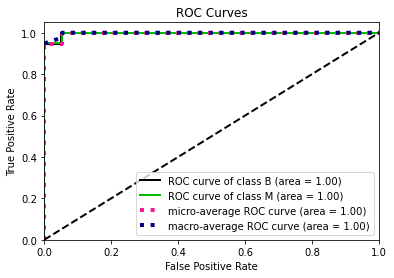

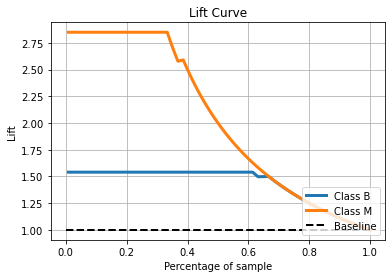

In [22]:
print ("Best cross validation score =",grid_log.best_score_)
print ("Best hyperparameter =",grid_log.best_params_)
print (grid_log.best_estimator_)

#Accuracy
print("Prediction Accuracy: ",accuracy_score(y_test, grid_log.predict(X_test)))

# Classification report
print(classification_report(y_test,grid_log.predict(X_test)))

#ROC
predicted_probas_grid_log = grid_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas_grid_log)

#Lift
skplt.metrics.plot_lift_curve(y_test, predicted_probas_grid_log)
plt.show()

It turned out that the best hyperparameter is when C=1000, penalty=l2 and solver=newton-cg.
The model accuracy on testing data is 0.9473.

In addition, I also drew the ROC curve and lift curve as below. For the ROC curve, classifiers that give curves closer to the top-left corner indicate a better performance. Therefore, the ROC performs well in my model. On the other hand, the lift curve shows that the model performance is better than by chance. For 10% of patient, using no model we should get 10% diagnosed 'M' and using the given model we should get around 29% diagnosed 'M'. For 10% of patient, using no model we should get 10% diagnosed 'B' and using the given model we should get around 15% diagnosed 'M'.